# 2.5.1 Измерение коэффицента поверхностного натяжения жидкости

## Расчёт диаметра иглы по сигма спирта

In [1]:
import numpy as np
## По разности давлений
dP = np.mean([48 + 1, 48 + 1, 47 + 1, 48 + 1, 48 + 1]) * 0.2 * 9.80655
print(f'dP = {dP}')
sigma_sp = 22.78 / 1e3
r_sp = 2 * sigma_sp / dP
print(f'r по сигма = {r_sp}')

dP = 95.711928
r по сигма = 0.0004760117255186836


In [2]:
# деления * цена деления * радиус
r_micro = (11.5 * 2) * (0.05 / 1e3) * (1/2)
r_micro_err = (0.5 * 0.05 / 1e3)

print(f'r по микроскопу = {r_micro} +- {r_micro_err:.7f}')

r по микроскопу = 0.000575 +- 0.0000250


In [3]:
dP_err_std = np.std([48 + 1, 48 + 1, 47 + 1, 48 + 1, 48 + 1], ddof=1) * 0.2 * 9.80655
print(f'dP_err_std = {dP_err_std}')

dP_err_sys = (0.5 * 0.2 * 9.80655)

dP_err = np.sqrt( np.square(dP_err_std) + np.square(dP_err_sys) )
print(f'dP_err = {dP_err} => epsilon_dP = {(dP_err / dP) * 100}%')
r_sp_err = 2 * sigma_sp * dP_err / (dP * dP)  ## TODO: Уместна ли эта формула?
print(f'r по сигма = {r_sp} +- {r_sp_err:.10f}')

dP_err_std = 0.8771244969900225
dP_err = 1.3156867454850338 => epsilon_dP = 1.3746319533810183%
r по сигма = 0.0004760117255186836 +- 0.0000065434


$$ r = \frac{2\sigma}{\Delta P} => \sigma_r = \frac{(2\sigma) \sigma_P}{\Delta P^2} $$

## Работа с h1 и h2

In [4]:
h_err = 0.5 * 1 / 1e3

h1 = 52 / 1e3
dP1 = 136 * 0.2 * 9.80655 
print(f'dP1 = {dP1}')

h2 = 71 / 1e3
dP2 = 225 * 0.2 * 9.80655 
print(f'dP2 = {dP2}')

dh_L = h2 - h1

# 789.5 - плотность спирта при 20*C (у нас было 22.7 и 22.9)
dh_P = (dP2 - dP1) / (9.815 * 789.5)
dh_P_err = np.sqrt(2) * dP_err_sys / (9.815 * 789.5) 

print(f'dh по давлениям = {dh_P} +- {dh_P_err}') # у нас разброса нет, остаётся только сист. часть.
print(f'dh по измерениям линейкой = {dh_L} +- {h_err}')

dP1 = 266.73816
dP2 = 441.29474999999996
dh по давлениям = 0.02252650474564755 +- 0.000178973531034588
dh по измерениям линейкой = 0.018999999999999996 +- 0.0005


## Расчёт сигма воды при различных температурах

In [5]:
r = r_micro # also r_sp

T1 = 22.9
dP1 = 225 * 0.2 * 9.80655
sigma_1 = r * dP1 / 2
print(f'T = {T1}, sigma = {sigma_1}')

T2 = 28.3
dP2 = ( np.mean([221, 220.5, 220, 220, 220, 220]) + 1 ) * 0.2 * 9.80655
sigma_2 = r * dP2 / 2
print(f'T = {T2}, sigma = {sigma_2}')

T3 = 34.2
dP3 = ( np.mean([220, 220.5, 220.5, 220.5, 220.5]) + 1 ) * 0.2 * 9.80655
sigma_3 = r * dP3 / 2
print(f'T = {T3}, sigma = {sigma_3}')

T4 = 38.5
dP4 = ( np.mean([219.5, 219.5, 219.5, 219.5]) + 1 ) * 0.2 * 9.80655
sigma_4 = r * dP4 / 2
print(f'T = {T4}, sigma = {sigma_4}')

T5 = 42.7
dP5 = ( np.mean([218, 218, 218]) + 1 ) * 0.2 * 9.80655
sigma_5 = r * dP5 / 2
print(f'T = {T5}, sigma = {sigma_5}')

T6 = 47.8
dP6 = ( np.mean([216.5, 216.5, 216.5]) + 1 ) * 0.2 * 9.80655
sigma_6 = r * dP6 / 2
print(f'T = {T6}, sigma = {sigma_6}')

T7 = 53.0
dP7 = ( np.mean([215, 215, 214.5, 215]) + 1 ) * 0.2 * 9.80655
sigma_7 = r * dP7 / 2
print(f'T = {T7}, sigma = {sigma_7}')

T8 = 58.0
dP8 = ( np.mean([213, 213, 213, 212.5, 212.5]) + 1 ) * 0.2 * 9.80655
sigma_8 = r * dP8 / 2
print(f'T = {T8}, sigma = {sigma_8}')

T9 = 34.6
dP9 = ( np.mean([216, 216, 216]) + 1 ) * 0.2 * 9.80655
sigma_9 = r * dP9 / 2
print(f'T = {T9}, sigma = {sigma_9}')

T10 = 28.0
dP10 = ( np.mean([218, 218, 218]) + 1 ) * 0.2 * 9.80655
sigma_10 = r * dP10 / 2
print(f'T = {T10}, sigma = {sigma_10}')

T = 22.9, sigma = 0.126872240625
T = 28.3, sigma = 0.12475770328125001
T = 34.2, sigma = 0.124842284775
T = 38.5, sigma = 0.12433479581250001
T = 42.7, sigma = 0.12348898087500002
T = 47.8, sigma = 0.12264316593749999
T = 53.0, sigma = 0.121726866421875
T = 58.0, sigma = 0.12055682242500002
T = 34.6, sigma = 0.12236122762500001
T = 28.0, sigma = 0.12348898087500002


> Следует заметить, что термометр показывает температуру воды в термостате. Время установления заданной температуры в колбе с исследуемой жидкостью довольно большое, поэтому после установления заданной температуры в термостате дождитесь прогрева исследуемой жидкости в колбе в течение нескольких минут (5-7 минут)

## Постороение графика сигма от T

0.1 0.005523384765798006
error_k = 0.0000264331


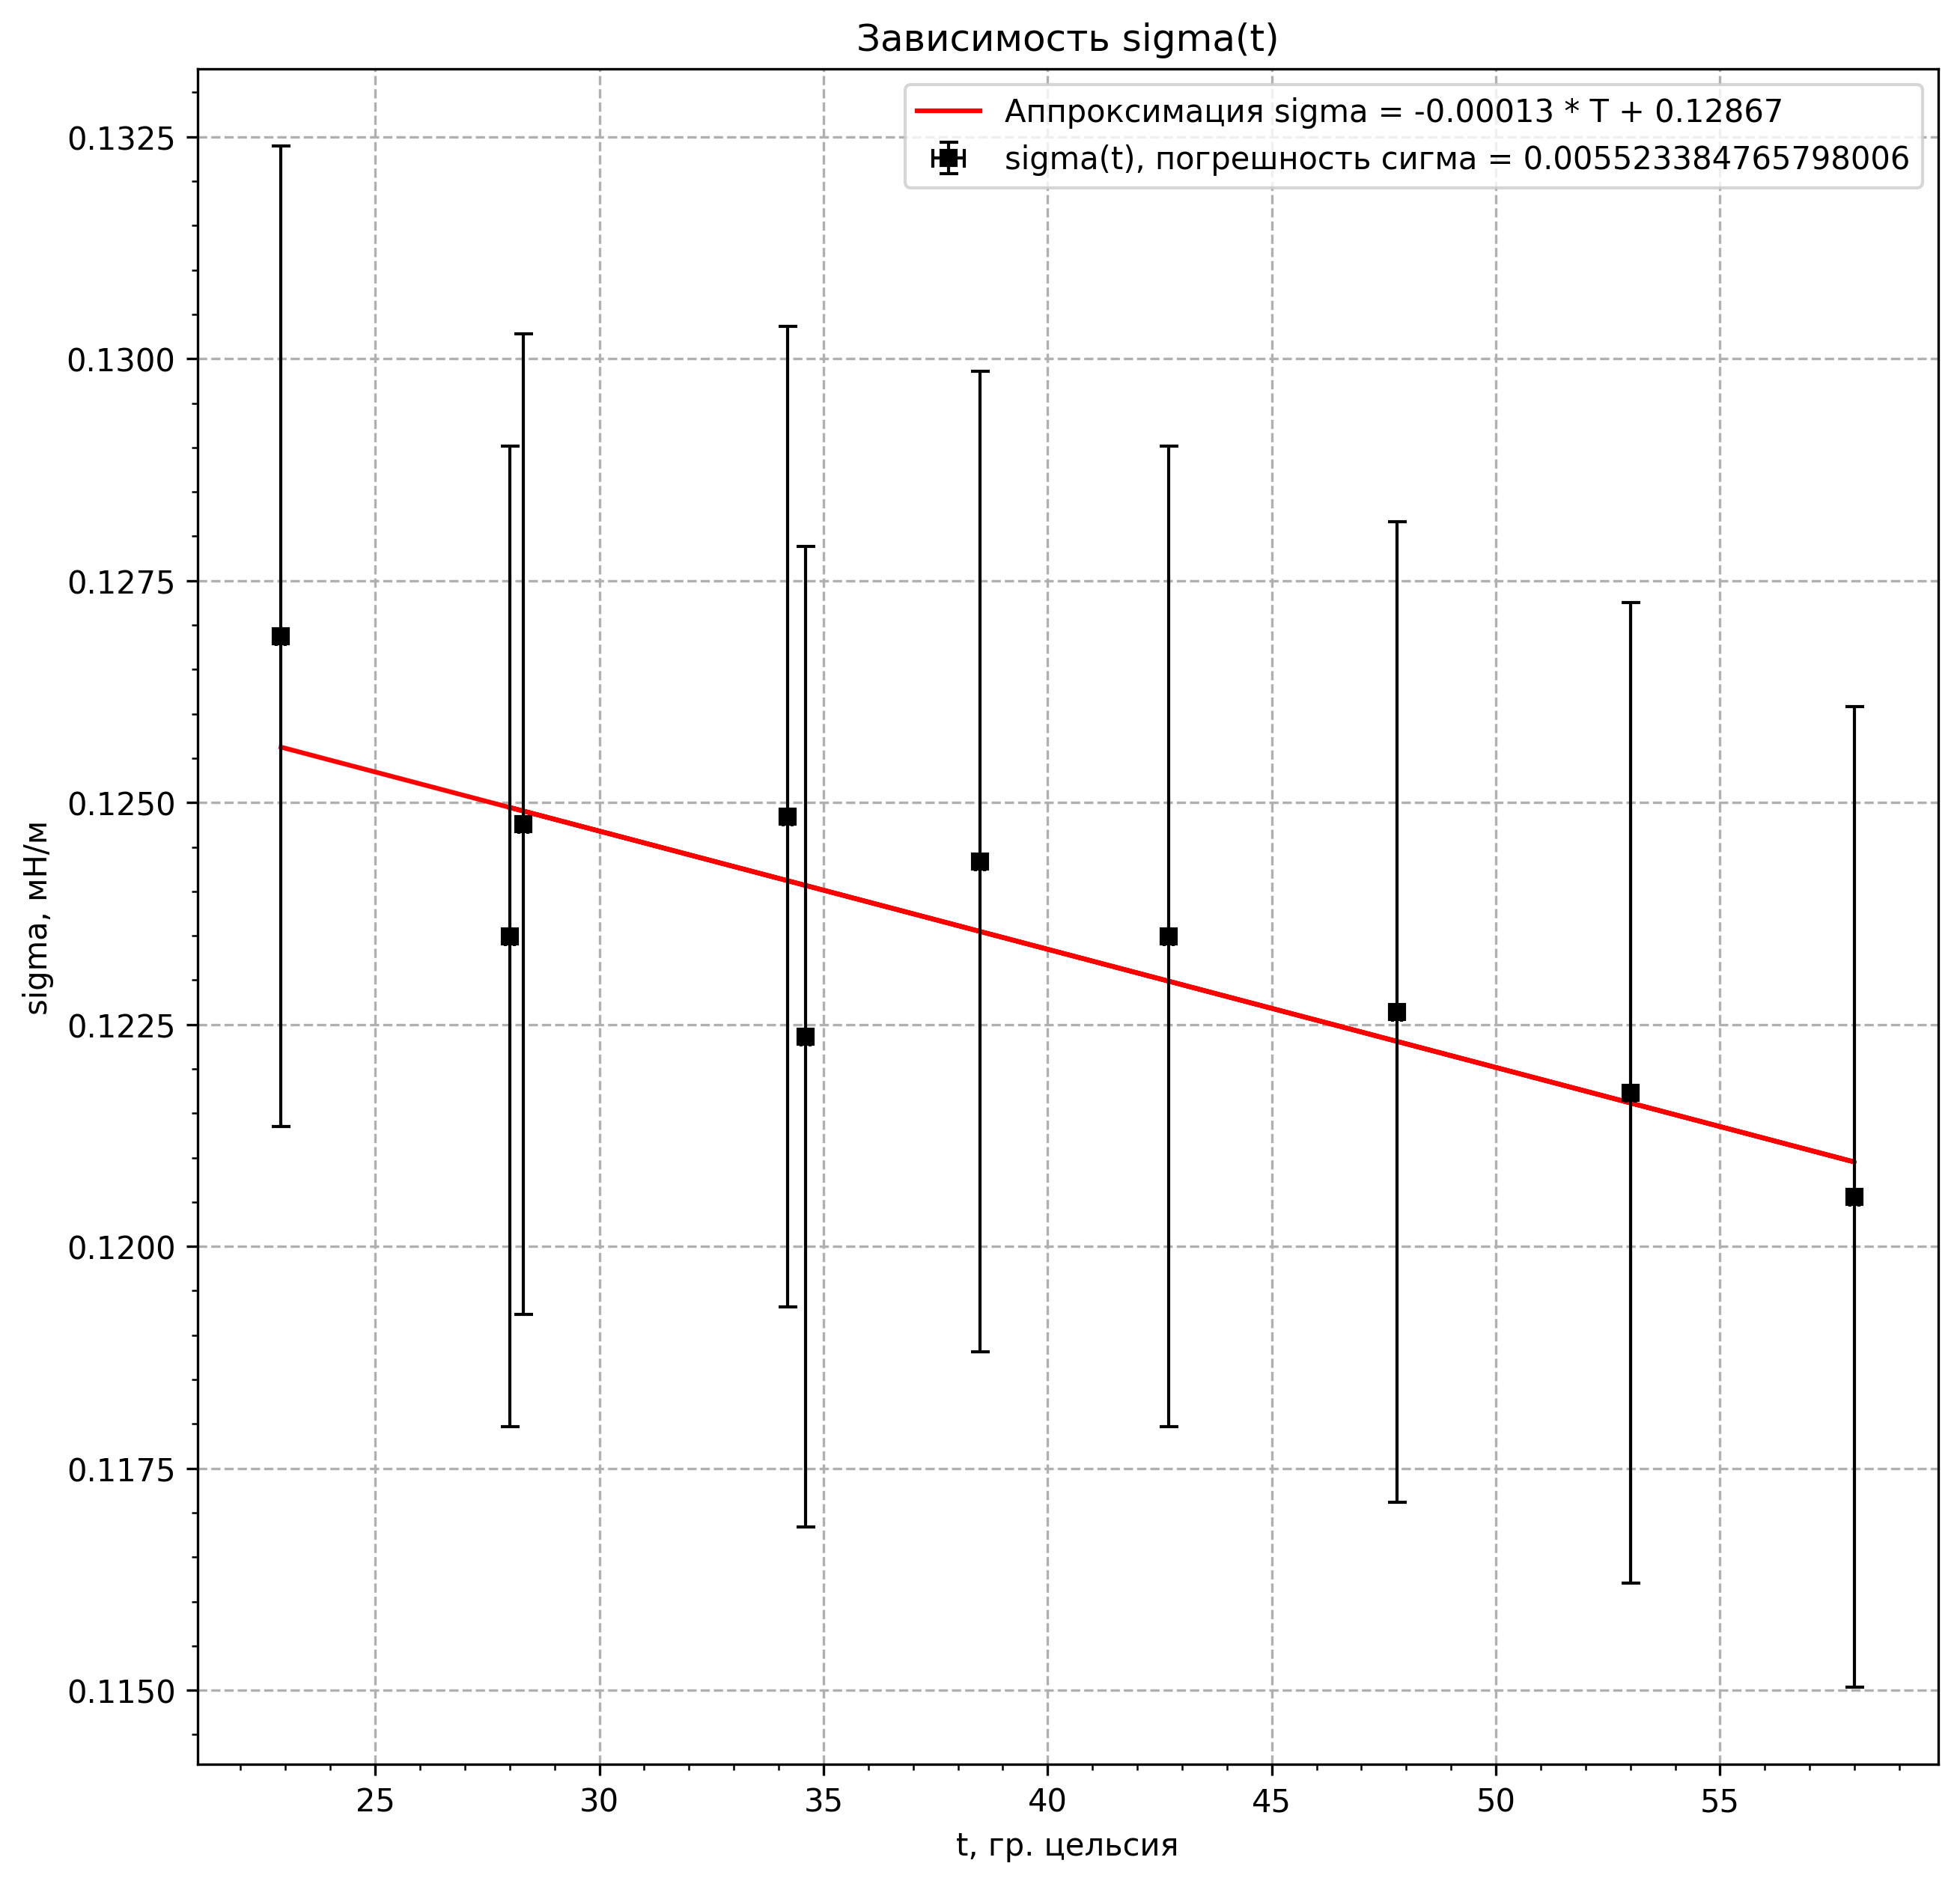

In [6]:
import matplotlib.pyplot as plt
X = np.array( [T1, T2, T3, T4, T5, T6, T7, T8, T9, T10] )
Y = np.array( [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6, sigma_7, sigma_8, sigma_9, sigma_10] )
X_err = 0.1
## print(max([dP2, dP3, dP4, dP5, dP6, dP7, dP8, dP9, dP10]))
Y_err = np.sqrt( np.square( max([dP1, dP2, dP3, dP4, dP5, dP6, dP7, dP8, dP9, dP10]) * r_micro_err / 2 )
                + np.square( r * dP_err_sys / 2 ) )
print(X_err, Y_err)

fig, ax = plt.subplots(figsize=(10,10), dpi=300)
ax.minorticks_on()
ax.grid(which='major', linestyle='--')

ax.set_title('Зависимость sigma(t)')
ax.set_xlabel('t, гр. цельсия')
ax.set_ylabel('sigma, мH/м')
#ax.set_xlim([0, max(X)+1])
#ax.set_ylim([0, max(Y)+0.01])

# ax.scatter(X[:-2], Y[:-2])
# ax.scatter(X[1:-2], Y[1:-2])
# ax.scatter([ X[1], X[-2], X[-1] ], [ Y[1], Y[-2], Y[-1] ], zorder=2)

ax.errorbar(X, Y, fmt='ks', linewidth=0, markersize=5, elinewidth=1, label=f'sigma(t), погрешность сигма = {Y_err}', 
    xerr=X_err, yerr=Y_err,
    capsize=3, zorder=3
)

(k, b) = np.polyfit(X, Y, 1)
ax.plot(X, k * X + b, color='r', label=f'Аппроксимация sigma = {k:.5f} * T + {b:.5f}')

n = len(X)
error_k = 1 / np.sqrt(n) * np.sqrt(((np.mean(Y * Y)) - np.mean(Y) ** 2) / (np.mean(X * X) - np.mean(X) ** 2) - k**2)
print(f'error_k = {error_k:.10f}')
ax.legend()

## Построение графика q от T

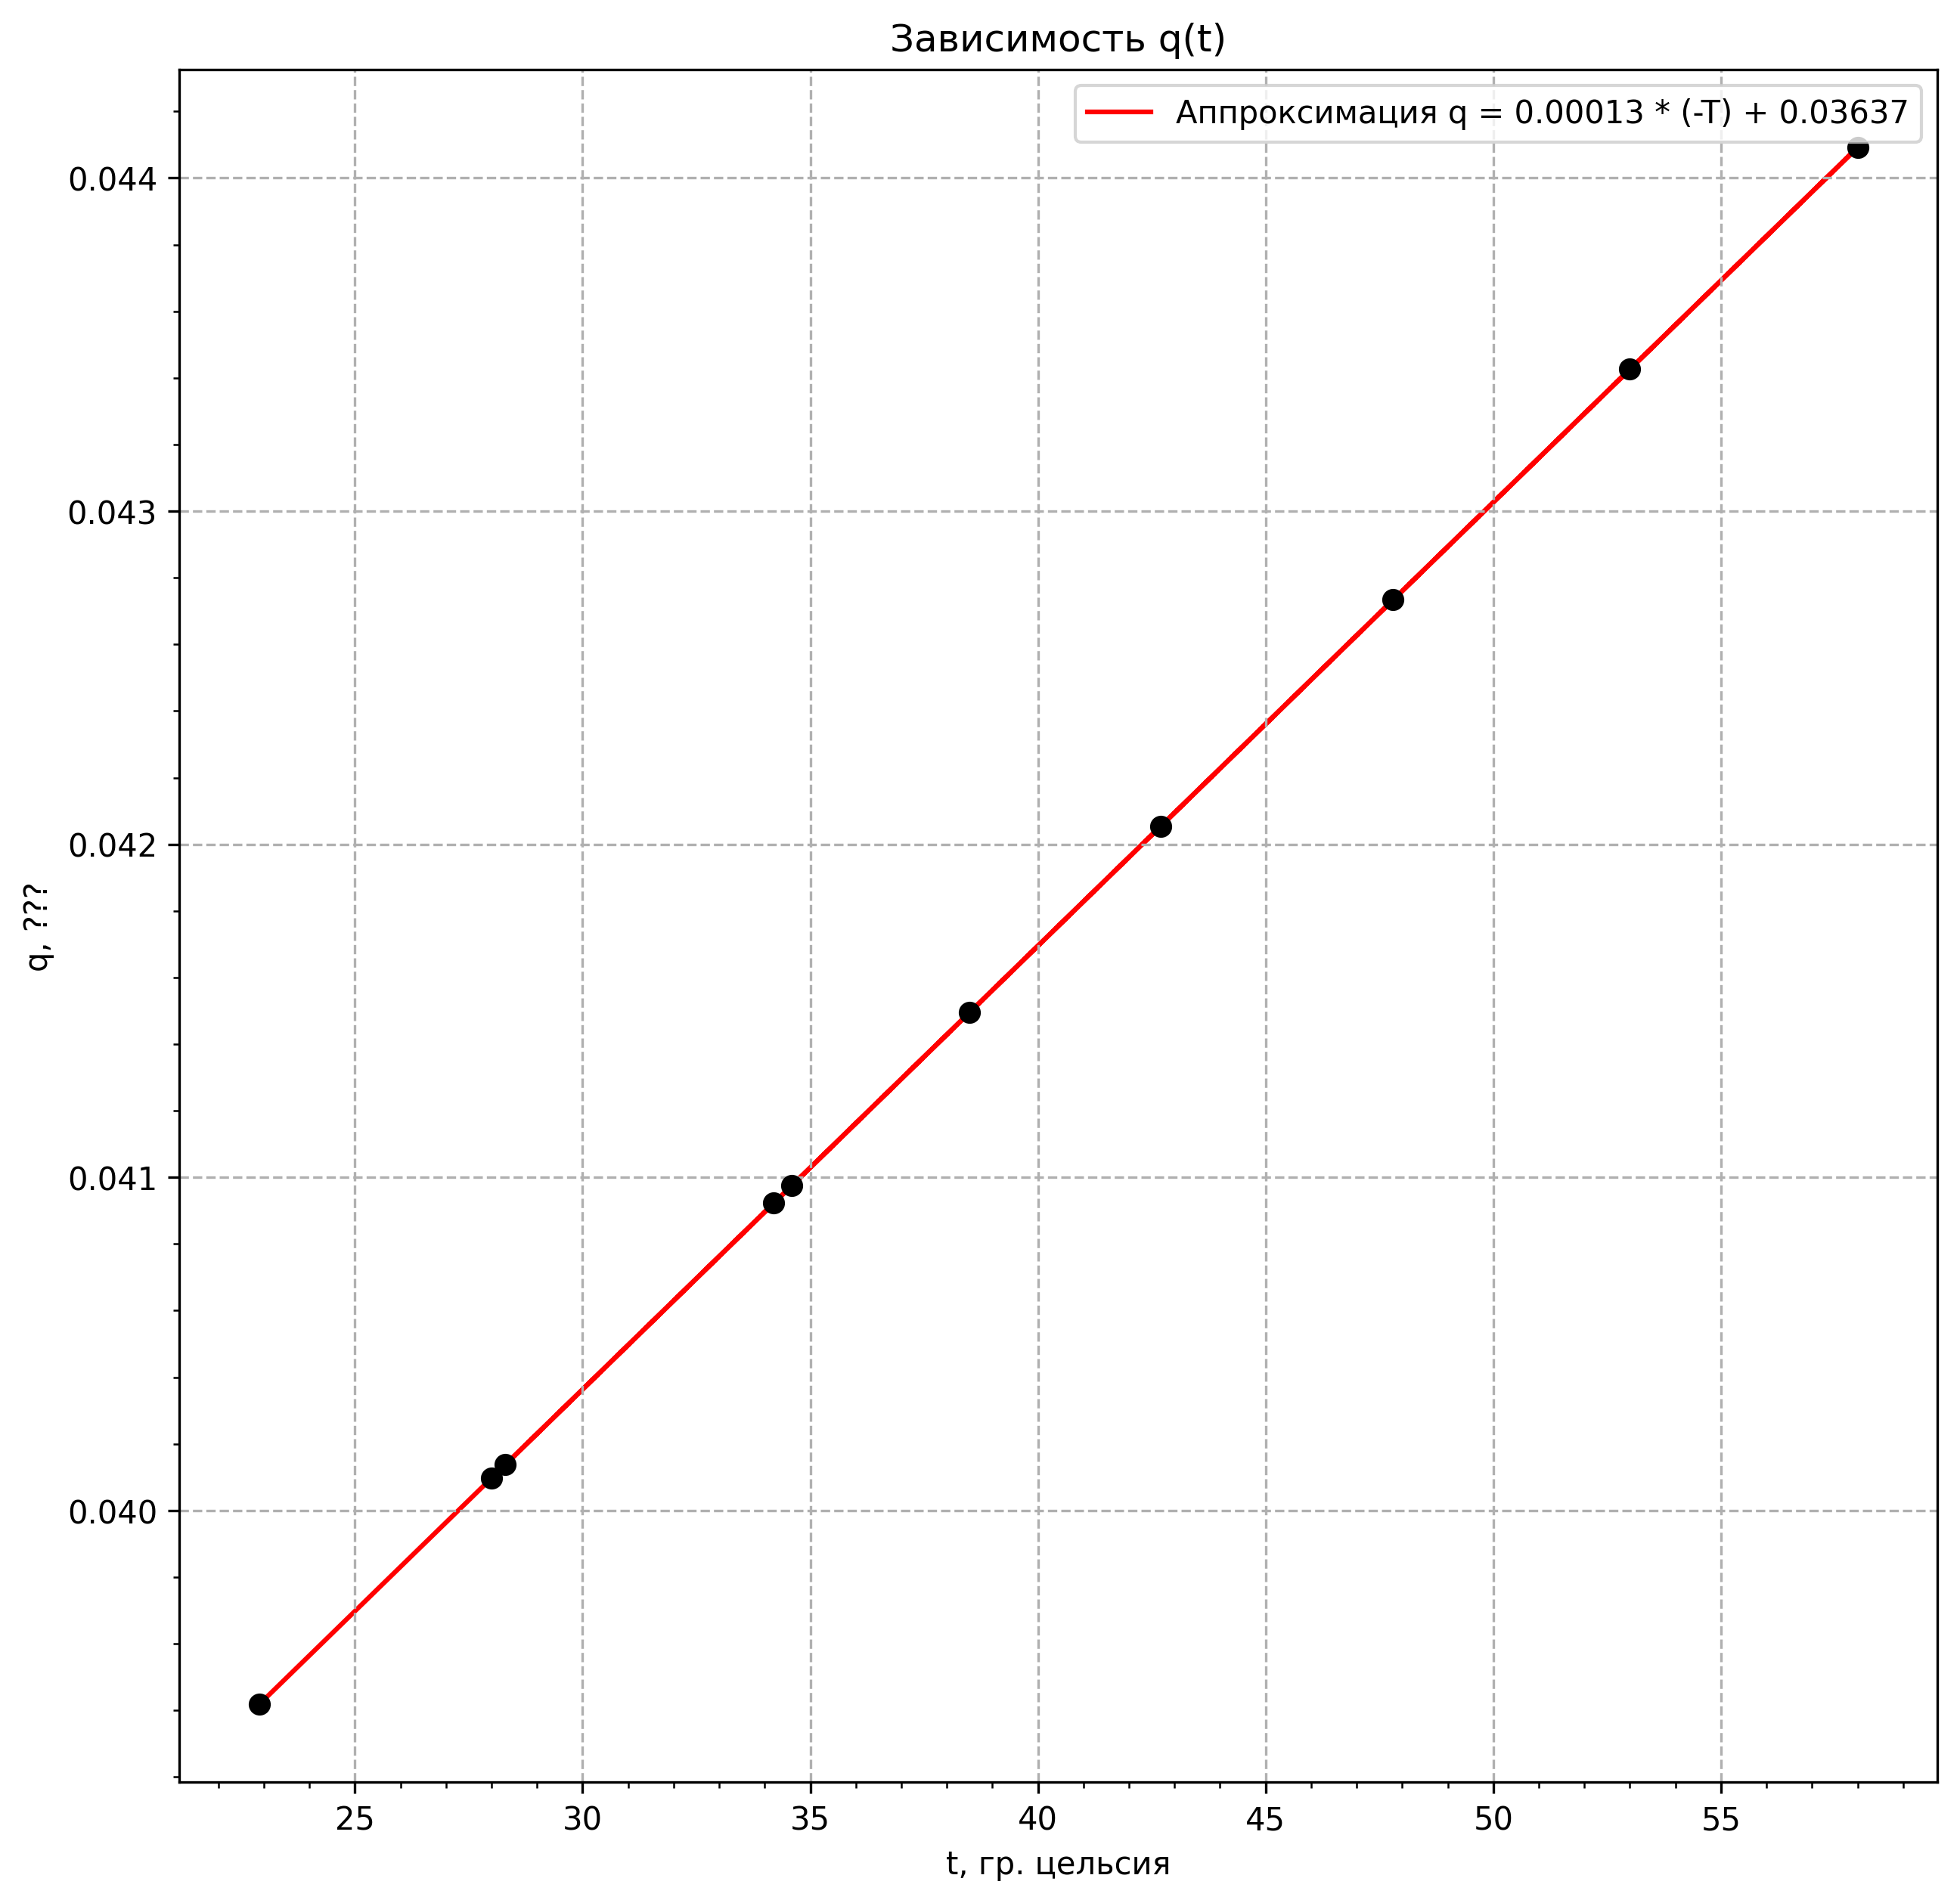

In [12]:
q = - (X+273.15) * k

fig_q, ax_q = plt.subplots(figsize=(10,10), dpi=300)
ax_q.minorticks_on()
ax_q.grid(which='major', linestyle='--')

ax_q.set_title('Зависимость q(t)')
ax_q.set_xlabel('t, гр. цельсия')
ax_q.set_ylabel('q, ???')

ax_q.scatter(X, q, color='k', zorder=2)

(k_q, b_q) = np.polyfit(X, q, 1)
ax_q.plot(X, k_q * X + b_q, color='r', label=f'Аппроксимация q = {k_q:.5f} * (-T) + {b_q:.5f}', zorder=1)
ax_q.legend()

## Построение графика поверхностной энергии единицы площади от T

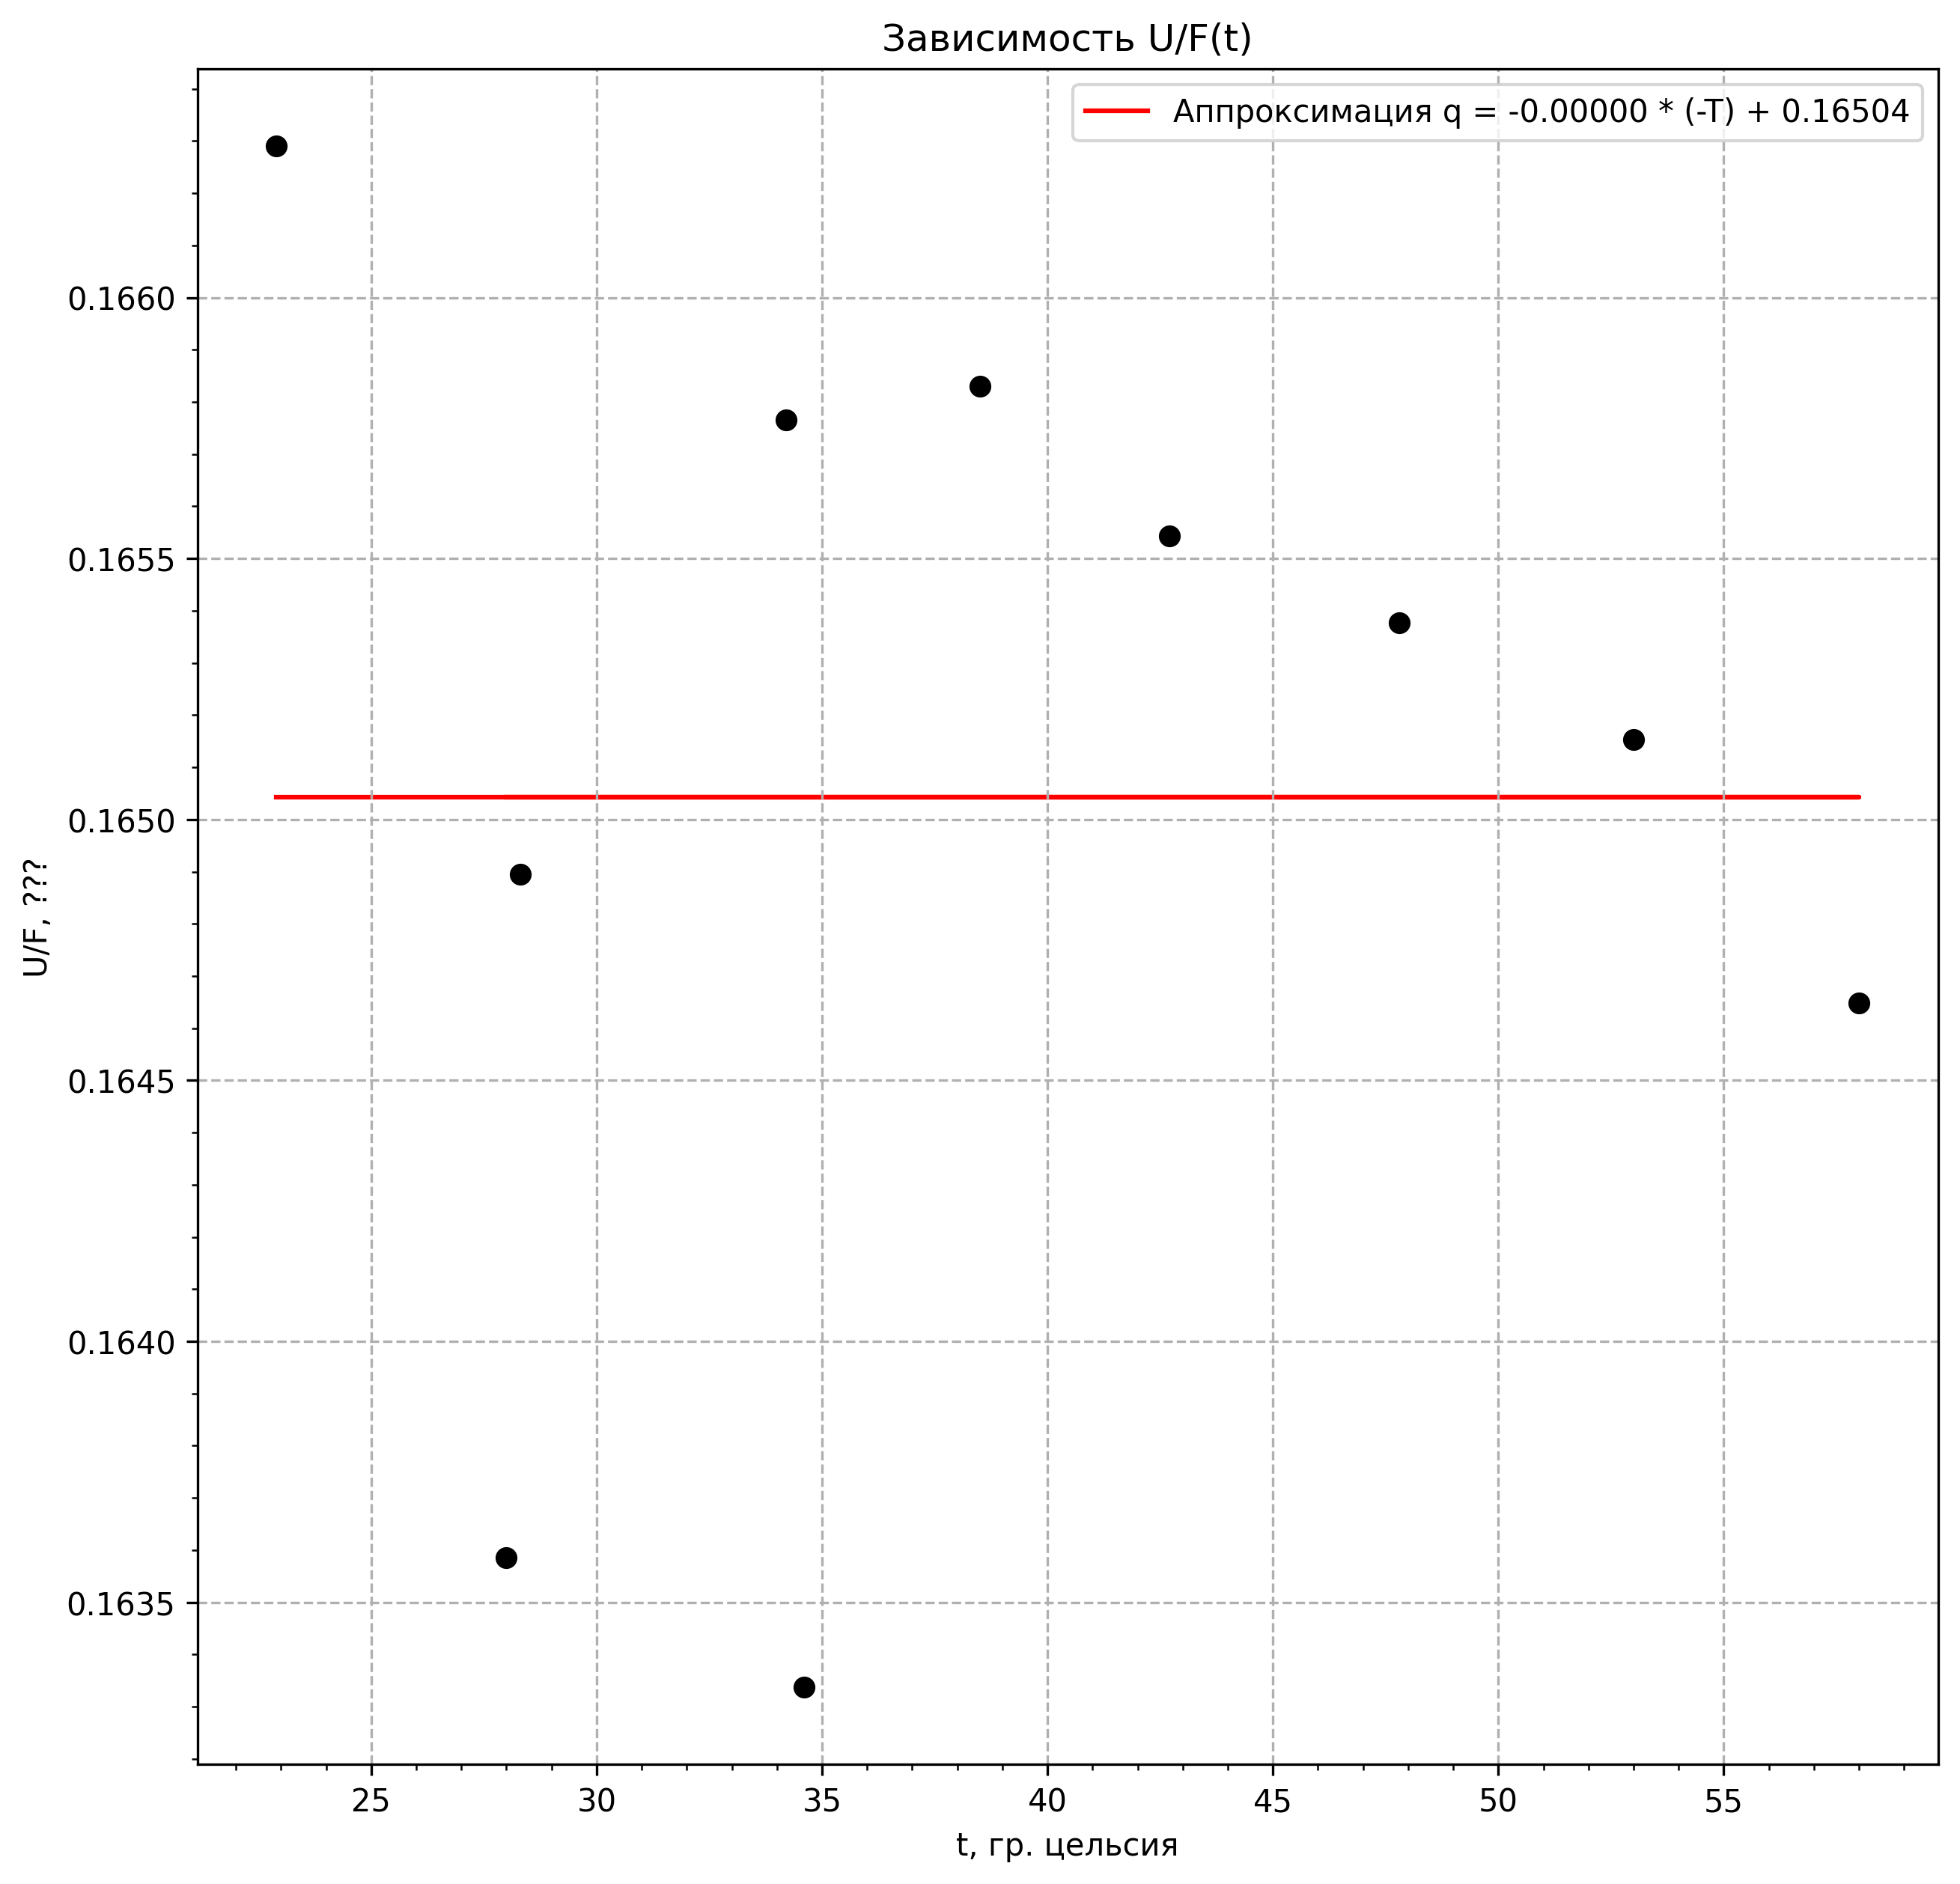

In [16]:
SIGMAS = np.array( [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6, sigma_7, sigma_8, sigma_9, sigma_10] )
VAL = SIGMAS - (X+273.15) * k

fig_val, ax_val = plt.subplots(figsize=(10,10), dpi=300)
ax_val.minorticks_on()
ax_val.grid(which='major', linestyle='--')

ax_val.set_title('Зависимость U/F(t)')
ax_val.set_xlabel('t, гр. цельсия')
ax_val.set_ylabel('U/F, ???')

ax_val.scatter(X, VAL, color='k')

(k_U, b_U) = np.polyfit(X, VAL, 1)
ax_val.plot(X, k_U * X + b_U, color='r', label=f'Аппроксимация q = {k_U:.5f} * (-T) + {b_U:.5f}', zorder=1)
ax_val.legend()